## Ebola and Wikipedia: Loading publicly available data using Julia

Julia consists of some basics that are always loaded, plus extensions that can be additionally loaded. One of these is the DelimitedFiles package, which is part of the standard library, but in order to use it, we have to load it. To do so is very simple: we just enter `using DelimitedFiles`. 

In [11]:
using DelimitedFiles
using Dates

In [3]:
wikiEVDraw = DelimitedFiles.readdlm("data/wikipediaEVDraw.csv", ',') # getting quotes right is important!

54×9 Matrix{Any}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953
 ⋮                                        ⋱                     
 "14 Jul 2014"    982    613   411   310  …   106       397      197
 "2 Jul 2014"     779    481   412   305       75       252      101
 "17 Jun 2014"    528    337   398   264       24        97       49
 "27 May 2014"    30

The `readdlm()` function is Julia's way to read any file that consists of lines separated into data items with a delimiter of some sort. In fact, the very word `readdlm` is an abbreviation of "read-with-a-delimiter".

Notice five things

* We loaded the DelimitedFiles package with `using DelimitedFiles`
* In order to user `readdlm()`, we have to say that it sits in the DelimitedFiles package, using the dot syntax `DelimitedFiles.readdlm()`. This use of dot syntax for referencing an object that sits inside another object is also used in languages like C++ and Java.
* We have used a variable to contain the data from the file (we could have changed the name, though)
* the file name is given as a string using double quotes
* The delimiter is given as a character, using single quotes

Finally, we see from the output the type of the data: after they have been stored in the variable as an array, the elements are of type `Any`. This is not good for computation -- in particular, for modelling we need the data in terms of days since the start of the epidemic. Our next job is to convert the strings in column one into integers which give the number of days since 22 March 2014.

Every computer language that deals with date-time has a rich array of functions to deal with it. In Julia, they are in a package called Dates. Of this package, we will use the functions `DateTime()` and `Dates.datetime2rata()`.

Why does one of them use the dot syntax and the other does not? The answer is that when we start up Julia, only a few of the functions in the packages Dates are visible. These functions include `DateTime()` but not `datetime2rata()`. However, we are able to access the other functions via the dot notation. We will talk more about packages later.

The `DateTime()` function uses a format string convert string data such as we see in column one into Julia DateTime data.

A format string is something one sees in many computation contexts. Here, it tells Julia in what form to expect the data. Looking at the date strings in the data, they have a number for the day, then space, then an abbreviation for the month, then a space, then a number for the year. The appropriate format string is therefore `"d u y"`. These formats have limitations: `d` accepts one- and two-digit days an `y` accepts two- and four-digit years, but `u` accepts only three-letter abbreviations. Unfortunately, data where the month names otherwise abbreviated are fairly common and they will need a different format string. 

### for loops

Many items that are vectorised in languages like Matlab and Python are explicitly computed in `for` loops in Julia. It may be surprising if we consider the speed up of computations in vectorisation, but it is frequently the case that a loop in Julia runs faster than the equivalent vectorised code.

In [8]:
for num = 3:7
    println("num is now $num")
end

testvalues = [23, "my name is not a name", 'ℵ']
for x in testvalues
    println("The value of x is now $x")
end

num is now 3
num is now 4
num is now 5
num is now 6
num is now 7
num is now 3
num is now 4
num is now 5
num is now 6
num is now 7
num is now 3
num is now 4
num is now 5
num is now 6
num is now 7
num is now 3
num is now 4
num is now 5
num is now 6
num is now 7
num is now 3
num is now 4
num is now 5
num is now 6
num is now 7
The value of x is now 23
The value of x is now my name is not a name
The value of x is now ℵ


It is important to get the first line of a `for` loop exactly right. It has the structure

"variable=iterable"

Here, "iterable" is anything that is arranged in a sequence. Not all types are, but they certainly include ranges (created with colon operator) and any single dimension array. The = is an assignment operator and it assigns to "variable" the values in "iterable", one after the other. This is, during each pass through the loop, "variable" has the value of exactly one of the items in "iterable".

In [9]:
col1 = wikiEVDraw[:, 1] # the cololon menas all the data in the column, the 1 means the first column

54-element Vector{Any}:
 "25 Nov 2015"
 "18 Nov 2015"
 "11 Nov 2015"
 "4 Nov 2015"
 "25 Oct 2015"
 "18 Oct 2015"
 "11 Oct 2015"
 "27 Sep 2015"
 "20 Sep 2015"
 "13 Sep 2015"
 ⋮
 "14 Jul 2014"
 "2 Jul 2014"
 "17 Jun 2014"
 "27 May 2014"
 "12 May 2014"
 "1 May 2014"
 "14 Apr 2014"
 "31 Mar 2014"
 "22 Mar 2014"

In [12]:
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "d u y") # note that this replaces the previous value of col1[i]
end

In [13]:
col1

54-element Vector{Any}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 ⋮
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

In [14]:
Dates.datetime2rata(col1[1]) # the "rata die days" format is a specialised date format, applied to a given date it gives the number of days since 1 January of the year 0001

735927

In [15]:
daysSinceMar22(x) = Dates.datetime2rata(x) - Dates.datetime2rata(col1[54])
epidays = Array{Int64}(undef, 54)
for i = 1:length(col1)
    epidays[i] = daysSinceMar22(col1[i])
end

In [16]:
# now, we want to export the data as follows
wikiEVDraw[:,1] = epidays # change the first column of wikiEVDraw with epidays
DelimitedFiles.writedlm("data/wikipediaEVDdatesconverted.csv", wikiEVDraw, ',')

In [27]:
using Plots

There are several backends for Plot available. The idea of Plots is that we specify a plot with identical code, irrespective of the backend. To change backends is then just to run the command for the new backend.

We use GR here for reasons that are not important for this lecture.

In [28]:
gr()

Plots.GRBackend()

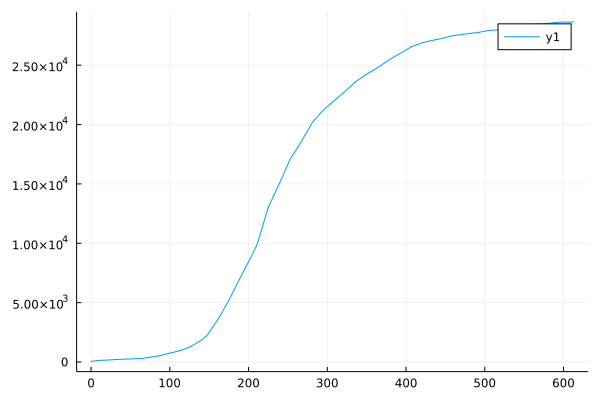

In [30]:
EVDdata = DelimitedFiles.readdlm("data/wikipediaEVDdatesconverted.csv", ',')
epidays = EVDdata[:, 1]
allcases = EVDdata[:,2]

plot(epidays, allcases)

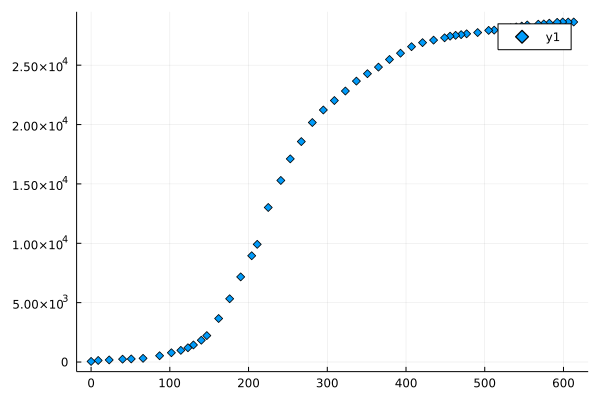

In [31]:
# tweaking the plot
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

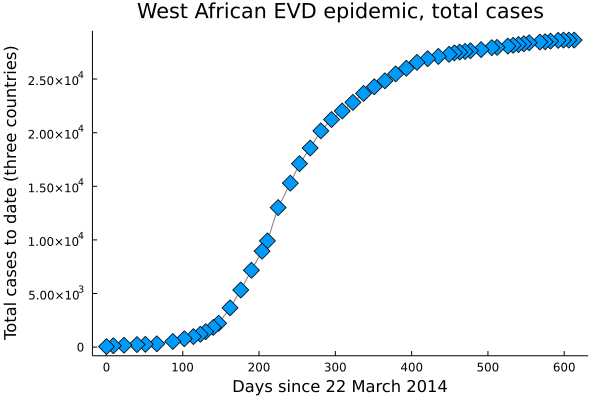

In [33]:
plot(epidays, allcases, 
    title = "West African EVD epidemic, total cases",
    xlabel = "Days since 22 March 2014",
    ylabel = "Total cases to date (three countries)",
    marker = (:diamond, 8),
    line = (:path, "gray"),
    legend = false,
    grid = false
)

In [ ]:
savefig("data/WAfricanEVD.pdf") # save as a pdf: note that no extension means that the figure will be saved as a png.